In [26]:
from sklearn import cluster, datasets, metrics, manifold, decomposition, random_projection 
from matplotlib import pyplot as plt
from scipy.stats import mode
from time import time
from sklearn.model_selection import train_test_split, learning_curve, validation_curve
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import plot_roc_curve, classification_report, accuracy_score
from sklearn.mixture import GaussianMixture
import numpy as np
import time as time
import seaborn as sns; sns.set()

# **DIGITS**

# **General idea of reconstruction error**

Text(0.5, 1.0, 'The number of components and reconstruct error distribution')

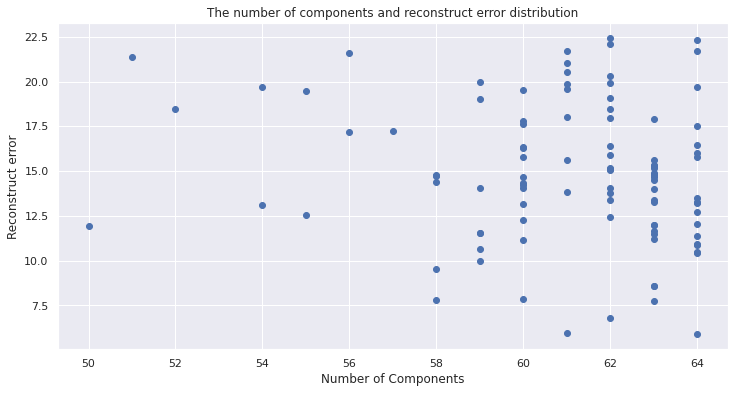

In [27]:
loop = 100
error = []
N = []
data = datasets.load_digits()
for i in range(0, loop):
  r = list(range(1, 65))
  original = np.var(data.data)
  d = []
  for i in r:
    rp = random_projection.GaussianRandomProjection(n_components=i)
    new_data = rp.fit_transform(data.data)
    d.append(abs(np.var(new_data)-original))
  n = r[d.index(min(d))]
  error.append(d[n-1])
  N.append(n)
plt.rcParams["figure.figsize"] = (12,6)
plt.scatter(N, error, marker='o', color='b')
plt.xlabel("Number of Components")
plt.ylabel("Reconstruct error")
plt.title('The number of components and reconstruct error distribution') 

# **Reconstruction error**

best error with n_comnonents :  58  with error is :  20.132522724190935


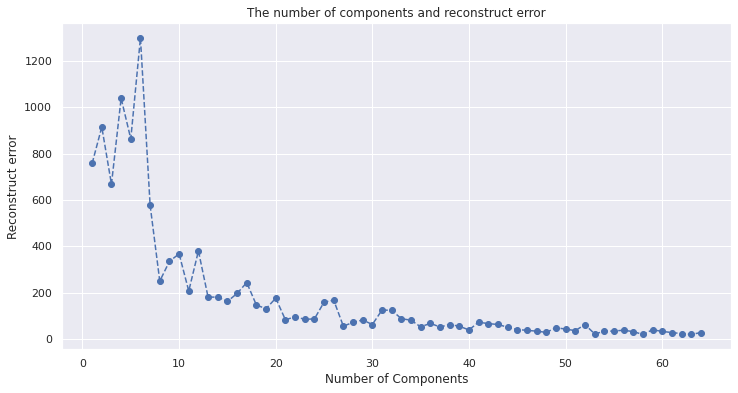

In [28]:
r = list(range(1, 65))
data = datasets.load_digits()
original = np.var(data.data)
d = []
for i in r:
  rp = random_projection.GaussianRandomProjection(n_components=i)
  new_data = rp.fit_transform(data.data)
  d.append(abs(np.var(new_data)-original))
plt.rcParams["figure.figsize"] = (12,6)
plt.plot(r, d, marker='o', linestyle='--', color='b')
n = r[d.index(min(d))]
plt.xlabel("Number of Components")
plt.ylabel("Reconstruct error")
plt.title('The number of components and reconstruct error')  
print ("best error with n_comnonents : ", n, " with error is : ", d[n-1])
rp = random_projection.GaussianRandomProjection(n_components=n)
new_data = rp.fit_transform(data.data)

# **Kmean--digits**

In [29]:
kmean = cluster.KMeans(n_clusters=10, max_iter=200)
clusters = kmean.fit_predict(new_data)
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(data.target[mask])[0]
accuracy = metrics.accuracy_score(data.target, labels)
print (accuracy)

0.7178631051752922


# **EM--digits**

In [30]:
kmean = GaussianMixture(n_components=10, max_iter=200)
clusters = kmean.fit_predict(new_data)
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(data.target[mask])[0]
accuracy = metrics.accuracy_score(data.target, labels)
print (accuracy)

0.7317751808569839


# **NN-digits--RP**

In [31]:
start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(new_data, data.target, test_size = 0.33)
nn = MLPClassifier(hidden_layer_sizes=(64), max_iter=500)
nn.fit(X_train, y_train)
nn_predicted = nn.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_predicted)
print (classification_report(y_test, nn_predicted))
print (nn_accuracy)
print("--- %s seconds ---" % (time.time() - start_time))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        54
           1       0.97      1.00      0.99        69
           2       1.00      1.00      1.00        57
           3       0.98      0.88      0.93        58
           4       0.97      0.98      0.98        61
           5       0.94      0.94      0.94        53
           6       0.98      0.96      0.97        56
           7       0.98      1.00      0.99        65
           8       0.82      0.97      0.89        63
           9       0.98      0.86      0.92        58

    accuracy                           0.96       594
   macro avg       0.96      0.96      0.96       594
weighted avg       0.96      0.96      0.96       594

0.9595959595959596
--- 1.6453101634979248 seconds ---


# **NN--digits--clusters--data**

In [32]:
u = np.concatenate((data.data, clusters.reshape(-1, 1)), axis=1)
start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(u, data.target, test_size = 0.33)
nn = MLPClassifier(hidden_layer_sizes=(64), max_iter=500)
nn.fit(X_train, y_train)
nn_predicted = nn.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_predicted)
print (classification_report(y_test, nn_predicted))
print (nn_accuracy)
print("--- %s seconds ---" % (time.time() - start_time))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        59
           1       0.91      0.95      0.93        55
           2       0.98      1.00      0.99        59
           3       1.00      0.96      0.98        48
           4       1.00      0.97      0.98        60
           5       1.00      0.97      0.99        71
           6       0.98      0.98      0.98        63
           7       1.00      0.98      0.99        58
           8       0.92      0.92      0.92        63
           9       0.90      0.98      0.94        58

    accuracy                           0.97       594
   macro avg       0.97      0.97      0.97       594
weighted avg       0.97      0.97      0.97       594

0.9696969696969697
--- 2.344606399536133 seconds ---


# **NN--digits--clusters**

In [33]:
start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(clusters.reshape(-1, 1), data.target, test_size = 0.33)
nn = MLPClassifier(hidden_layer_sizes=(64), max_iter=500)
nn.fit(X_train, y_train)
nn_predicted = nn.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_predicted)
print (classification_report(y_test, nn_predicted))
print (nn_accuracy)
print("--- %s seconds ---" % (time.time() - start_time))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        64
           1       0.40      0.89      0.55        46
           2       0.55      0.84      0.67        61
           3       0.00      0.00      0.00        55
           4       0.98      0.90      0.94        72
           5       0.53      0.45      0.49        62
           6       0.92      1.00      0.96        59
           7       0.83      0.92      0.87        60
           8       0.00      0.00      0.00        62
           9       0.41      0.66      0.50        53

    accuracy                           0.67       594
   macro avg       0.56      0.66      0.60       594
weighted avg       0.58      0.67      0.61       594

0.6683501683501684
--- 3.757117748260498 seconds ---


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **WINE**

# **General idea of reconstruction error**

Text(0.5, 1.0, 'The number of components and reconstruct error distribution')

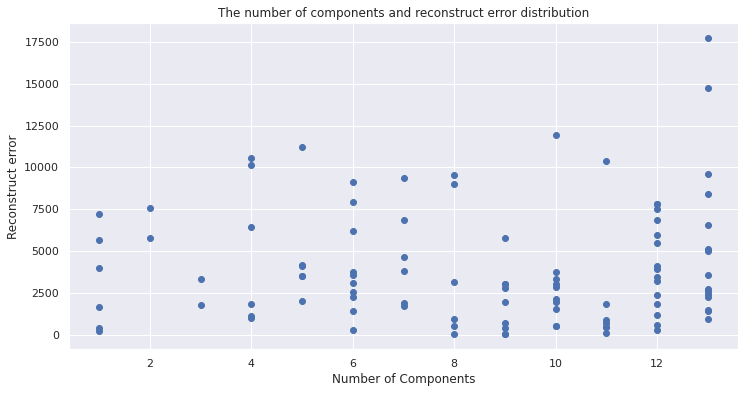

In [34]:
loop = 100
error = []
N = []
data = datasets.load_wine()
for i in range(0, loop):
  r = list(range(1, 14))
  original = np.var(data.data)
  d = []
  for i in r:
    rp = random_projection.GaussianRandomProjection(n_components=i)
    new_data = rp.fit_transform(data.data)
    d.append(abs(np.var(new_data)-original))
  n = r[d.index(min(d))]
  error.append(d[n-1])
  N.append(n)
plt.rcParams["figure.figsize"] = (12,6)
plt.scatter(N, error, marker='o', color='b')
plt.xlabel("Number of Components")
plt.ylabel("Reconstruct error")
plt.title('The number of components and reconstruct error distribution') 

# **Reconstruction error**

best error with n_comnonents :  12  with error is :  2040.5968612816432


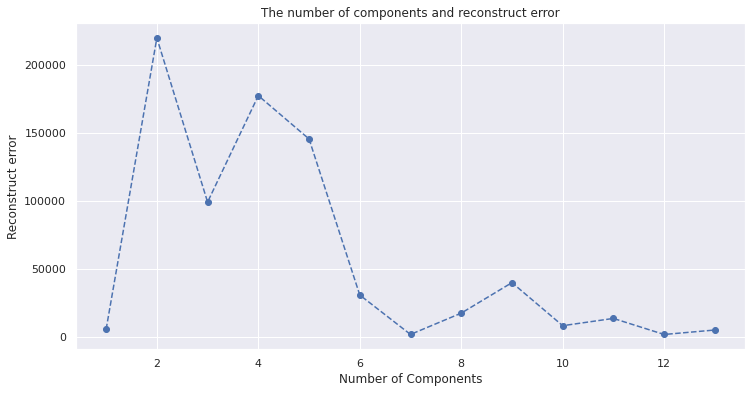

In [35]:
r = list(range(1, 14))
data = datasets.load_wine()
original = np.var(data.data)
d = []
for i in r:
  rp = random_projection.GaussianRandomProjection(n_components=i)
  new_data = rp.fit_transform(data.data)
  d.append(abs(np.var(new_data)-original))
plt.rcParams["figure.figsize"] = (12,6)
plt.plot(r, d, marker='o', linestyle='--', color='b')
n = r[d.index(min(d))]
plt.xlabel("Number of Components")
plt.ylabel("Reconstruct error")
plt.title('The number of components and reconstruct error')  
print ("best error with n_comnonents : ", n, " with error is : ", d[n-1])
rp = random_projection.GaussianRandomProjection(n_components=n)
new_data = rp.fit_transform(data.data)

# **Kmean--wine**

In [36]:

kmean = cluster.KMeans(n_clusters=10, max_iter=200)
clusters = kmean.fit_predict(new_data)
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(data.target[mask])[0]
accuracy = metrics.accuracy_score(data.target, labels)
print (accuracy)

0.7191011235955056


# **EM--wine**

In [37]:
kmean = GaussianMixture(n_components=10, max_iter=200)
clusters = kmean.fit_predict(new_data)
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(data.target[mask])[0]
accuracy = metrics.accuracy_score(data.target, labels)
print (accuracy)

0.7303370786516854


# **NN--wine--RP**

In [38]:
start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(new_data, data.target, test_size = 0.33)
nn = MLPClassifier(hidden_layer_sizes=(64), max_iter=500)
nn.fit(X_train, y_train)
nn_predicted = nn.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_predicted)
print (classification_report(y_test, nn_predicted))
print (nn_accuracy)
print("--- %s seconds ---" % (time.time() - start_time))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        20
           1       0.86      0.96      0.91        25
           2       1.00      0.79      0.88        14

    accuracy                           0.90        59
   macro avg       0.92      0.88      0.90        59
weighted avg       0.91      0.90      0.90        59

0.8983050847457628
--- 0.3870100975036621 seconds ---


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# **NN--wine--clusters--data**

In [39]:
u = np.concatenate((data.data, clusters.reshape(-1, 1)), axis=1)
start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(u, data.target, test_size = 0.33)
nn = MLPClassifier(hidden_layer_sizes=(64), max_iter=500)
nn.fit(X_train, y_train)
nn_predicted = nn.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_predicted)
print (classification_report(y_test, nn_predicted))
print (nn_accuracy)
print("--- %s seconds ---" % (time.time() - start_time))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79        15
           1       0.00      0.00      0.00        32
           2       0.28      0.83      0.42        12

    accuracy                           0.42        59
   macro avg       0.31      0.61      0.40        59
weighted avg       0.22      0.42      0.29        59

0.423728813559322
--- 0.06031489372253418 seconds ---


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **NN--wine--clusters**

In [40]:
start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(clusters.reshape(-1, 1), data.target, test_size = 0.33)
nn = MLPClassifier(hidden_layer_sizes=(64), max_iter=500)
nn.fit(X_train, y_train)
nn_predicted = nn.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_predicted)
print (classification_report(y_test, nn_predicted))
print (nn_accuracy)
print("--- %s seconds ---" % (time.time() - start_time))

              precision    recall  f1-score   support

           0       0.75      0.52      0.62        23
           1       0.50      0.86      0.63        21
           2       0.86      0.40      0.55        15

    accuracy                           0.61        59
   macro avg       0.70      0.59      0.60        59
weighted avg       0.69      0.61      0.60        59

0.6101694915254238
--- 0.36296820640563965 seconds ---


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
